# <center>Laboratorium <br>Metod Numerycznych <br> Całkowanie numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import main
from numpy.polynomial.legendre import leggauss
from scipy.integrate import quad





Całkowanie numeryczne to dziedzina matematyki numerycznej zajmująca się przybliżonym obliczaniem wartości całek matematycznych, zwłaszcza tych, które nie mają rozwiązania analitycznego lub gdy obliczenia analityczne są trudne lub niemożliwe do przeprowadzenia. Całkowanie numeryczne jest szeroko stosowane w praktyce, szczególnie w obszarach takich jak nauki przyrodnicze, inżynieria, ekonometria, czy analiza danych.

Podstawowe metody całkowania numerycznego obejmują:

**Metoda prostokątów**

Metoda prostokątów: Polega na przybliżeniu całki poprzez sumowanie wartości funkcji w punktach lewego brzegu podprzedziałów i pomnożenie tego przez szerokość podprzedziału.

$
\int_{x_0}^{x_n}f(x)dx\approx h\sum_{i=0}^{n-1}f(x_i)
$

gdzie:
$
h = \frac{x_n-x_0}{n}
$

**Metoda trapezów**

Metoda trapezów: Podobnie jak metoda prostokątów, ale używa trapezów zamiast prostokątów. Jest bardziej dokładna dla funkcji, które nie są zupełnie równoległe osi x.

$
\int_{x_0}^{x_n}f(x)dx\approx \sum_{i=0}^{n-1}\frac{h}{2}(f(x_{i+1})+f(x_i))
$

***Zadanie 1.***

Zaimplementuj metodę prostokątów oraz metodę trapezów w pliku main zgodnie z opisem.

***Zadanie 2.***

Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod zaimplementowanych w zadaniu 1  


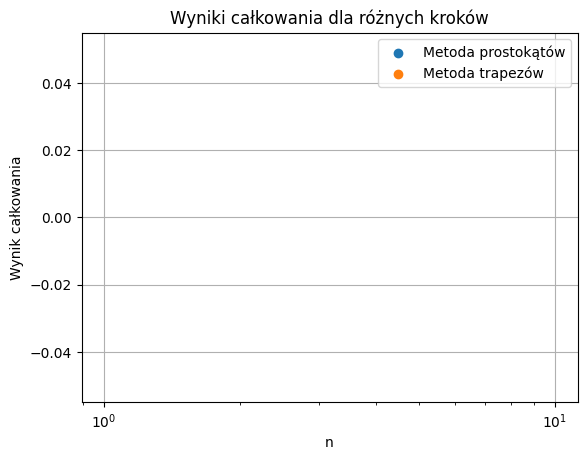

In [4]:
a = 0
b = np.pi * 0.25
ns = [10,100,1000,int(1e4)]
f = lambda x : np.log10(1 + np.tan(x))

y1 = [main.rectangular_rule(f,a,b,n) for n in ns]
y2 = [main.trapezoidal_rule(f,a,b,n) for n in ns]

plt.figure()
plt.grid(True)
plt.xscale('log')
plt.scatter(ns,y1,label="Metoda prostokątów")
plt.scatter(ns,y2,label="Metoda trapezów")
plt.xlabel("n")
plt.ylabel("Wynik całkowania")
plt.title("Wyniki całkowania dla różnych kroków")
plt.legend()
plt.show()

***Zadanie 3.***

Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 2.



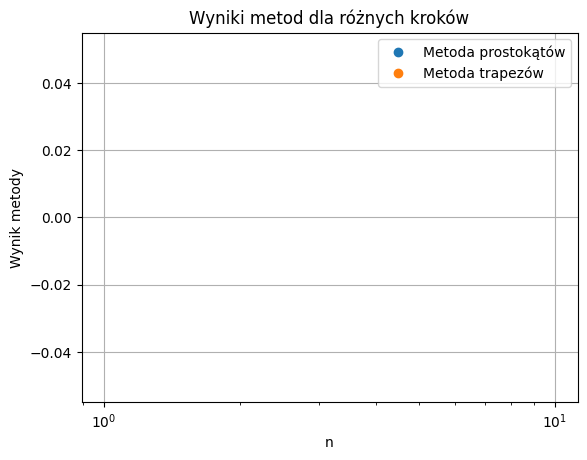

In [5]:
a = 0
b = 1
n = 1000
f = lambda x : np.exp(x**2)

y1 = [main.rectangular_rule(f,a,b,n) for n in ns]
y2 = [main.trapezoidal_rule(f,a,b,n) for n in ns]

plt.figure()
plt.grid(True)
plt.xscale('log')
plt.plot(ns,y1,"o",label="Metoda prostokątów")
plt.plot(ns,y2,"o",label="Metoda trapezów")
plt.xlabel("n")
plt.ylabel("Wynik metody")
plt.title("Wyniki metod dla różnych kroków")
plt.legend()
plt.show()

***Zadanie 4.***

Dane są funkcje:

$$f(x) = e^{-x^2}$$

$$g(x) = \frac{1}{x^2+4}$$


Napisz funkcję całkującą *custom_integration*, która wykorzystuje kwadraturę Gaussa-Legendre'a zaimplementowaną w bibliotece numpy.polynomial.legendre. Funkcja powinna przyjmować funkcję do zintegrowania, przedział całkowania oraz rząd kwadratury. Przedział ten zostanie przeskalowany do standardowego przedziału (-1, 1) używając wag i węzłów uzyskanych z funkcji leggauss. Następnie funkcja powinna obliczyć wartość całki przy użyciu kwadratury Gaussa-Legendre'a.

W celu oceny dokładności metody, należy porównać wyniki uzyskane za pomocą tej funkcji z wynikami uzyskanymi za pomocą metody trapezów (np.trapz) na wybranych funkcjach na różnych przedziałach. Równocześnie, należy analizować, jak błąd całkowania zmienia się wraz ze wzrostem rzędu kwadratury. Do tego celu należy użyć funkcji semilogy z biblioteki matplotlib w celu stworzenia wykresu w skali logarytmicznej.




In [6]:
f = lambda x : np.exp(-x * x)
g = lambda x : 1 / (x**2 + 4)

ranges = [(-2,2), (5,10), (-30,-10)]
for r in ranges:
    a, b = r
    ns = [int(1e1),int(1e2), int(1e3),int(5e1),int(5e2)] 
    integral_f = [main.custom_integration(f,a,b,n) for n in ns]
    trapz_f = [np.trapz(f(np.linspace(a,b,n)), np.linspace(a,b,n)) for n in ns]

    err = abs(np.array(trapz_f) - np.array(integral_f))

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
    ax1.grid(True)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel("n")
    ax1.set_ylabel("błąd")
    ax1.set_title(f"Błąd całkowania funkcji f \n metodą custom_integration dla przedziału {{{a}, {b}}}")
    ax1.plot(ns, err, 'o')

    integral_f = [main.custom_integration(g,a,b,n) for n in ns]
    trapz_f = [np.trapz(g(np.linspace(a,b,n)), np.linspace(a,b,n)) for n in ns]

    err = abs((np.array(trapz_f) - np.array(integral_f)))

    ax2.grid(True)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel("n")
    ax2.set_ylabel("błąd")
    ax2.set_title(f"Błąd całkowania funkcji g \n metodą custom_integration dla przedziału {{{a}, {b}}}")
    ax2.plot(ns, err, 'o')

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

***Zadanie 5***


Wyznacz wartość całki wykorzystując funkcje z *zadania 4* oraz całkowanie adaptacyjne (jest to funkcja *scipy.integrate.quad*).

Zbadaj jak zmienia się błąd całkowania zmieniając błąd względny i bezwzględny w funkcji *quad*. Wybierz 10 różnych wartości.

Utwórz wykres błędu całki w zależności od liczby wywołań funkcji podcałkowej. Liczba wywołań jest w argumencie wyjściowym infodict jako 'neval'.

In [ ]:
epss = np.logspace(-1,-17,10)

a = 0
b = 10

functions = {"f" : f, "g" : g}
for letter, function in functions.items():
    errors=[]
    nevals = []
    for eps in epss:
        _, err, infodict = quad(function,a,b, epsrel = eps, full_output=True)
        errors.append(err)
        nevals.append(infodict['neval'])

    for eps in epss:
        _, err, infodict = quad(function,a,b, epsabs = eps,  full_output=True)
        errors.append(err)
        nevals.append(infodict['neval'])


    fig2, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
    ax1.set_yscale('log')
    ax1.grid(True)
    ax1.set_xlabel("n")
    ax1.set_ylabel("błąd całkowania")
    ax1.set_title(f"Błąd całkowania funkcji {letter} \n w zależności od liczby wywołań funkcji podcałkowej")
    ax1.plot(nevals, errors, 'o')


    ax2.grid(True)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel("Tolerancja")
    ax2.set_ylabel("błąd całkowania")
    ax2.set_title(f"Błąd całkowania funkcji {letter} \n w zależności od tolerancji")
    ax2.plot(epss, errors[int(len(errors)/2):], 'o')
    plt.show()

### Wnioski
1. Wraz ze wzrostem liczby wywołań funkcji wzrasta jej dokładność, czyli maleje błąd całkowy.
2. Liczba wywołań funkcji podcałkowej jest wielokrotnością 21.
3. Wraz ze wzrostem tolerancji zwiększa się nasz błąd, co jest intuicyjne,


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)